# Exploratory Data Analysis: Spring Boot Contributor Data

This notebook provides basic exploratory data analysis of the Spring Boot contributor data to understand patterns and relationships between contributor experience and impact.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

# Set visualization styles
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Disable warnings
warnings.filterwarnings("ignore")

## 1. Data Loading and Initial Inspection

Let's load the datasets and examine their structure.

In [2]:
# Load the contributor impact dataset
contributor_data = pd.read_csv('data/contributor_impact_dataset.csv')

# Display basic information
print(f"Dataset shape: {contributor_data.shape}")
contributor_data.head()

Dataset shape: (1166, 19)


,author_name,first_contribution,last_contribution,total_commits,total_files_changed,total_additions,total_deletions,years_since_first_commit,active_years,total_changes,impact_score,impact_per_year,avg_additions_per_commit,avg_deletions_per_commit,avg_files_per_commit,commits_per_year,recency_score,consistency_score,weighted_impact_score
0,/usr/local/ΕΨΗΕΛΩΝ,2015-11-03 11:30:34+00:00,2015-11-03 11:30:34+00:00,1,1,13,0,9.831622,0.000000,13,31.2,inf,13.000000,0.000000,1.0,inf,0.017385,0.00000,21.921363
1,0xflotus,2018-10-01 16:23:02+00:00,2018-10-01 19:29:33+00:00,3,3,5,5,6.921287,0.000000,10,28.1,inf,1.666667,1.666667,1.0,inf,0.308419,0.00000,20.969986
2,1993heqiang,2023-02-25 12:58:48+00:00,2023-03-30 14:46:18+00:00,2,3,11,11,2.518823,0.090349,22,38.1,421.697727,5.500000,5.500000,1.5,22.136364,0.757700,0.03587,31.205251
3,67,2022-11-11 07:44:26+00:00,2022-11-11 07:44:26+00:00,1,2,2,2,2.809035,0.000000,4,10.4,inf,2.000000,2.000000,2.0,inf,0.719370,0.00000,8.402218
4,70825,2023-08-19 06:35:33+00:00,2023-08-19 06:35:33+00:00,1,4,7,7,2.039699,0.000000,14,23.3,inf,7.000000,7.000000,4.0,inf,0.796304,0.00000,19.093082


In [3]:
# Check for missing values
missing_values = contributor_data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")

Missing values per column:
No missing values found


In [4]:
# Convert date columns to datetime
contributor_data['first_contribution'] = pd.to_datetime(contributor_data['first_contribution'])
contributor_data['last_contribution'] = pd.to_datetime(contributor_data['last_contribution'])

In [5]:
# Basic statistics for numerical columns
contributor_data.describe()

,total_commits,total_files_changed,total_additions,total_deletions,years_since_first_commit,active_years,total_changes,impact_score,impact_per_year,avg_additions_per_commit,avg_deletions_per_commit,avg_files_per_commit,commits_per_year,recency_score,consistency_score,weighted_impact_score
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1.166000e+03,1.166000e+03,1166.00000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1.166000e+03
mean,25.849914,189.389365,3385.071184,1980.878216,5.631113,0.512981,5.365949e+03,7.927709e+03,inf,64.495275,24.493242,5.522257,inf,0.509537,0.067528,7.466192e+03
std,314.040481,1879.980850,35290.022760,22823.818620,3.740291,1.868266,5.538809e+04,8.168754e+04,NaN,251.988402,189.166313,60.608297,NaN,0.308262,0.198961,7.928175e+04
min,1.000000,1.000000,0.000000,0.000000,0.010951,0.000000,1.000000e+00,5.700000e+00,2.73982,0.000000,0.000000,1.000000,0.230369,0.000000,0.000000,4.335628e+00
25%,1.000000,1.000000,2.000000,1.000000,2.563997,0.000000,4.000000e+00,1.020000e+01,NaN,1.500000,1.000000,1.000000,NaN,0.264956,0.000000,7.555861e+00
50%,1.000000,2.000000,10.000000,2.000000,5.300479,0.000000,1.500000e+01,3.040000e+01,NaN,8.000000,2.000000,1.000000,NaN,0.540178,0.000000,2.365261e+01
75%,1.000000,4.000000,52.000000,10.000000,7.840520,0.000000,6.875000e+01,1.181250e+02,NaN,39.468750,7.000000,2.500000,NaN,0.782820,0.000000,9.405878e+01
max,7738.000000,37895.000000,762326.000000,599552.000000,17.144422,16.829569,1.145232e+06,1.584984e+06,inf,3856.000000,4596.000000,1875.375000,inf,1.000000,0.999541,1.540736e+06


## 2. Contributor Activity Analysis

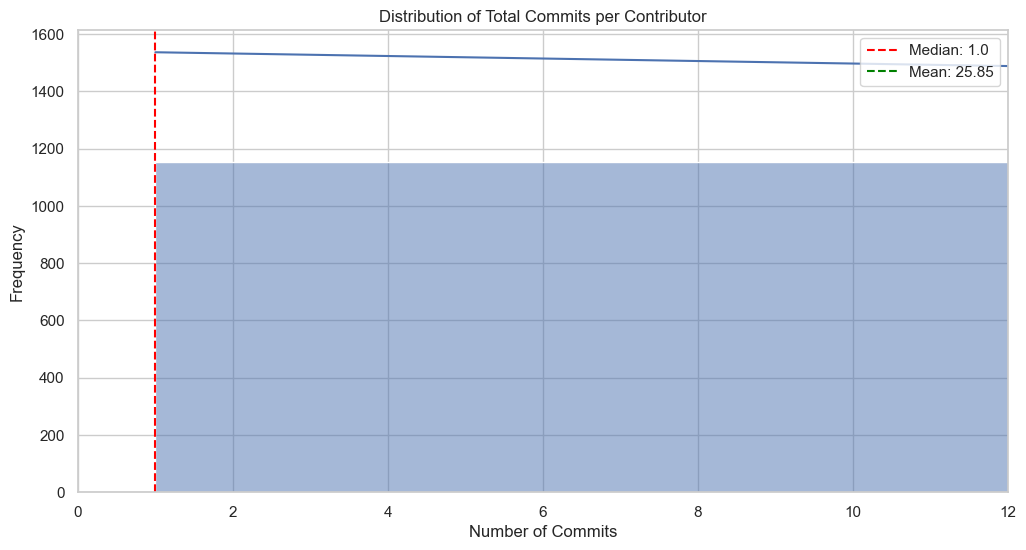

In [6]:
# Distribution of total commits
plt.figure(figsize=(12, 6))
sns.histplot(contributor_data['total_commits'], bins=30, kde=True)
plt.title('Distribution of Total Commits per Contributor')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.axvline(contributor_data['total_commits'].median(), color='red', linestyle='--', label=f"Median: {contributor_data['total_commits'].median()}")
plt.axvline(contributor_data['total_commits'].mean(), color='green', linestyle='--', label=f"Mean: {contributor_data['total_commits'].mean():.2f}")
plt.legend()
plt.xlim(0, contributor_data['total_commits'].quantile(0.95))  # Limit x-axis to 95th percentile for better visibility
plt.show()

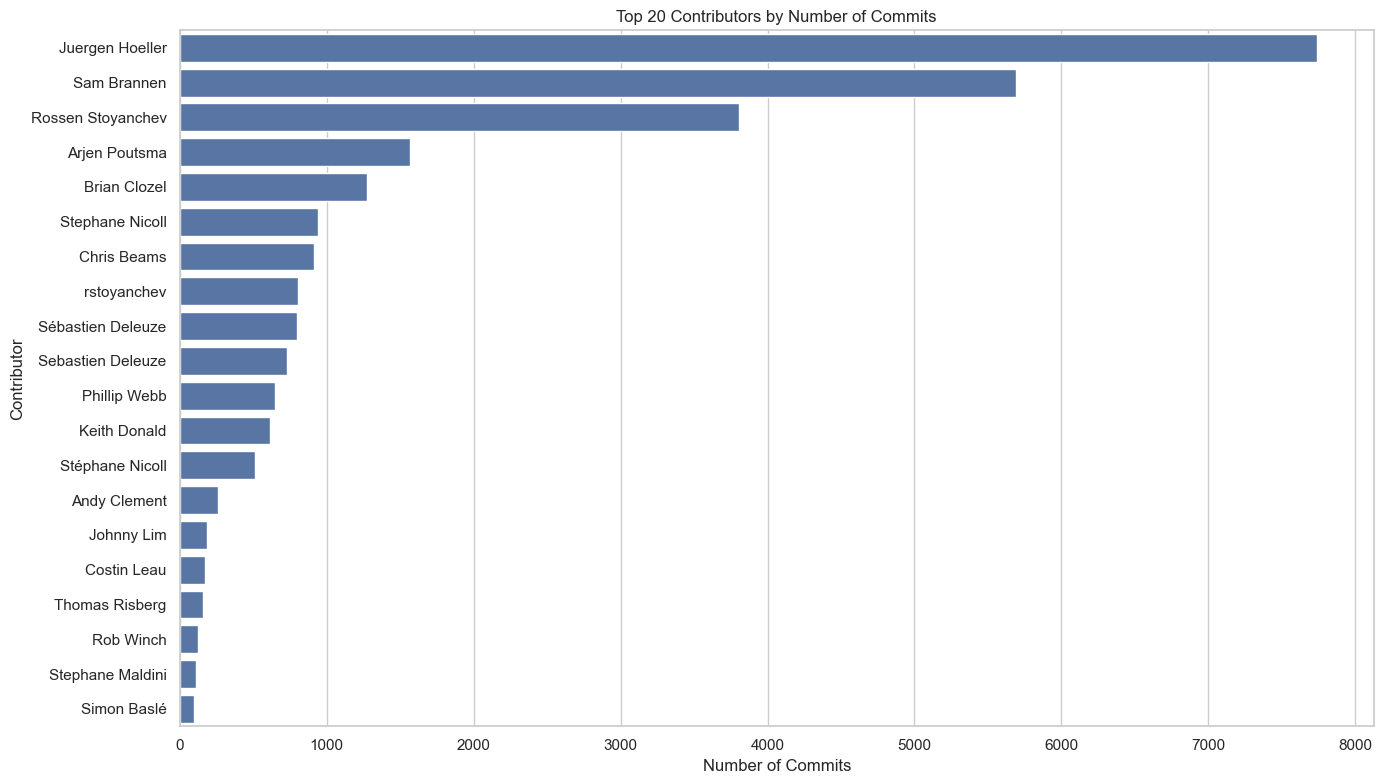

In [7]:
# Top 20 contributors by total commits
top_contributors = contributor_data.sort_values('total_commits', ascending=False).head(20)
plt.figure(figsize=(14, 8))
sns.barplot(x='total_commits', y='author_name', data=top_contributors)
plt.title('Top 20 Contributors by Number of Commits')
plt.xlabel('Number of Commits')
plt.ylabel('Contributor')
plt.tight_layout()
plt.show()

## 3. Experience vs. Impact Analysis

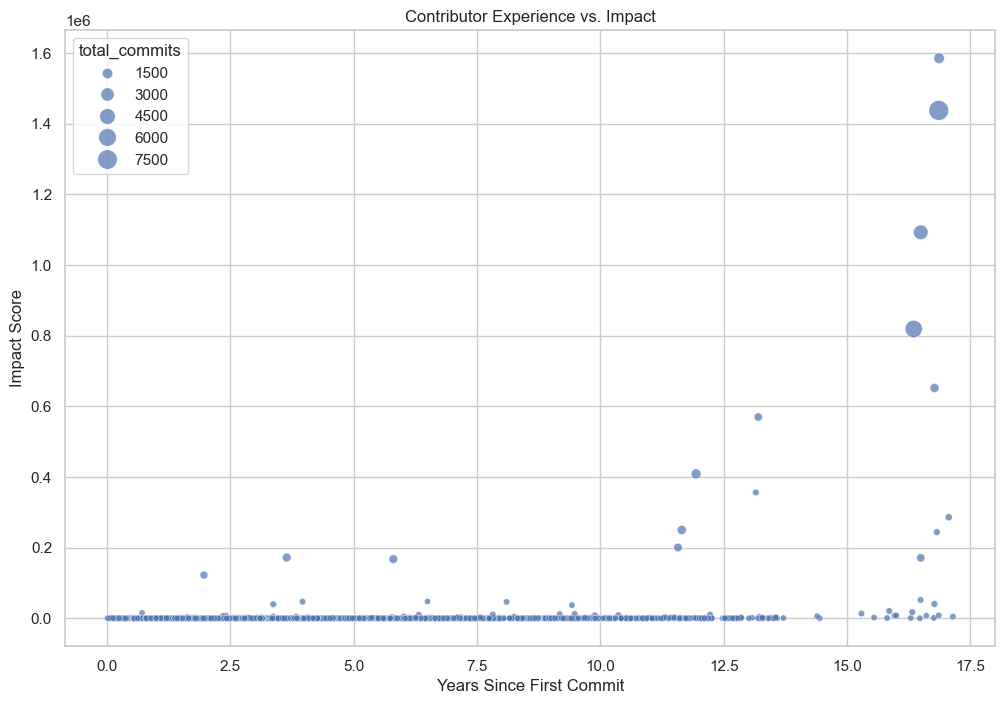

In [8]:
# Scatter plot of experience vs. impact
plt.figure(figsize=(12, 8))
sns.scatterplot(x='years_since_first_commit', y='impact_score', 
                size='total_commits', sizes=(20, 200),
                alpha=0.7, data=contributor_data)
plt.title('Contributor Experience vs. Impact')
plt.xlabel('Years Since First Commit')
plt.ylabel('Impact Score')
plt.grid(True)
plt.show()

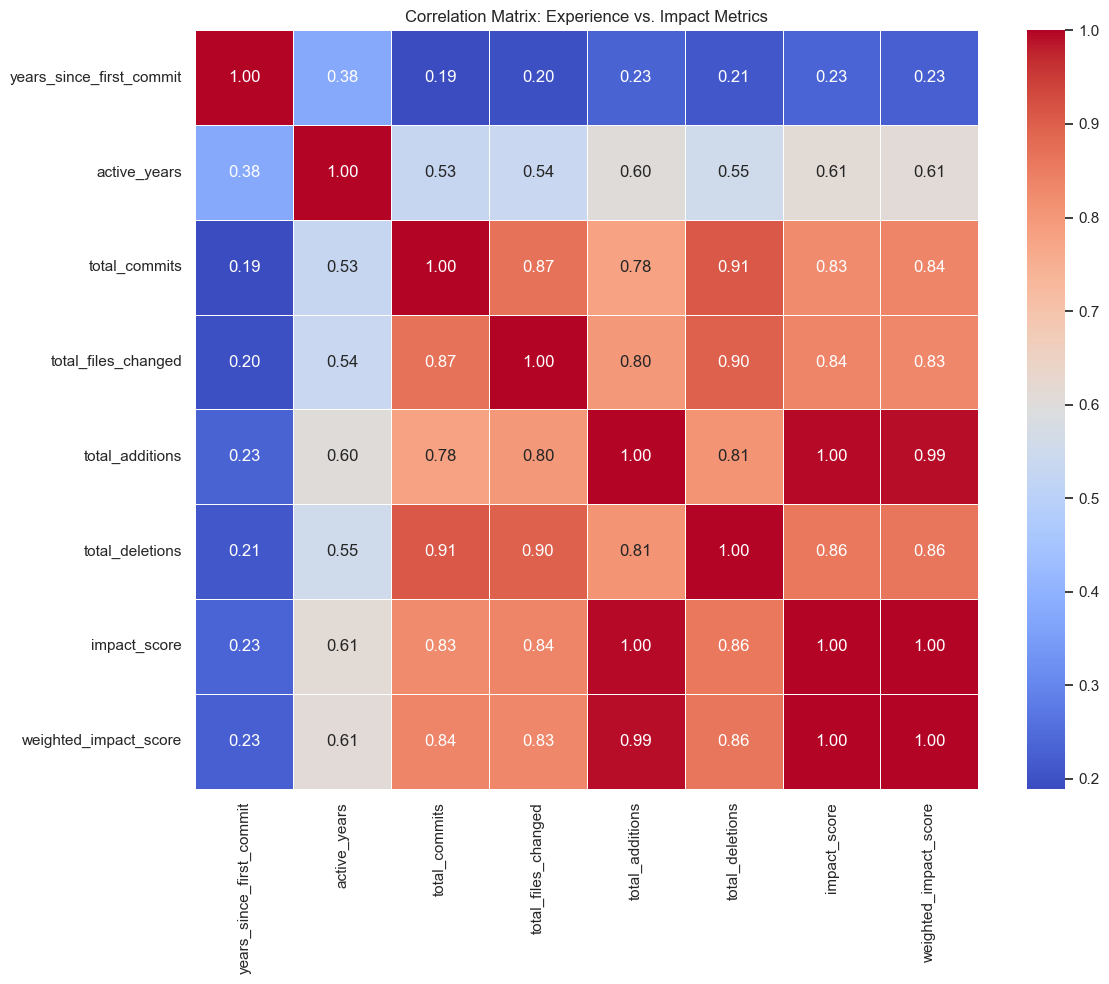

In [9]:
# Calculate correlation between experience and impact metrics
correlation_columns = ['years_since_first_commit', 'active_years', 'total_commits', 
                       'total_files_changed', 'total_additions', 'total_deletions', 
                       'impact_score', 'weighted_impact_score']

correlation_matrix = contributor_data[correlation_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Experience vs. Impact Metrics')
plt.tight_layout()
plt.show()

## 4. Contributor Retention Analysis

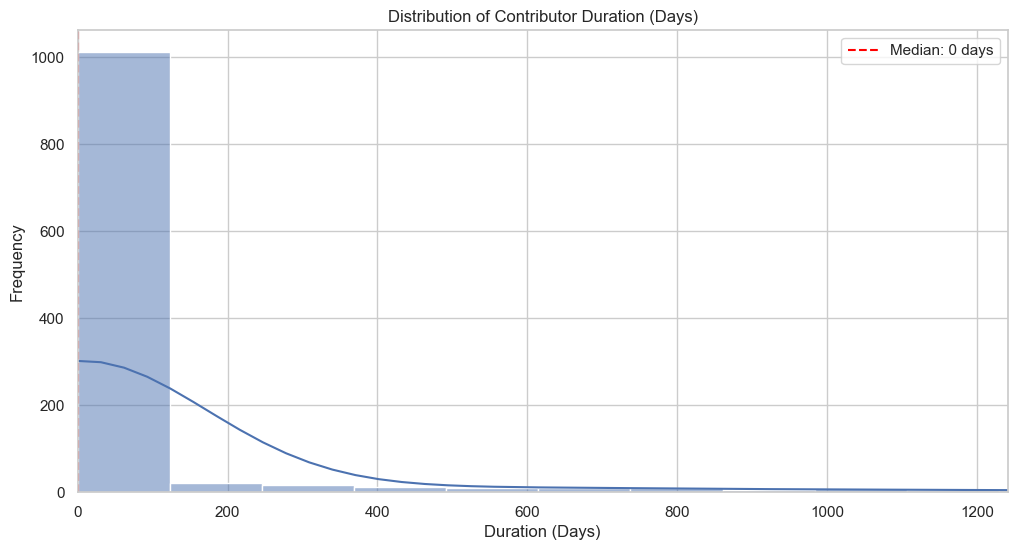

In [10]:
# Calculate contribution duration in days
contributor_data['contribution_duration'] = (contributor_data['last_contribution'] - 
                                            contributor_data['first_contribution']).dt.days

# Distribution of contribution duration
plt.figure(figsize=(12, 6))
sns.histplot(contributor_data['contribution_duration'], bins=50, kde=True)
plt.title('Distribution of Contributor Duration (Days)')
plt.xlabel('Duration (Days)')
plt.ylabel('Frequency')
plt.axvline(contributor_data['contribution_duration'].median(), color='red', 
           linestyle='--', label=f"Median: {contributor_data['contribution_duration'].median():.0f} days")
plt.legend()
plt.xlim(0, contributor_data['contribution_duration'].quantile(0.95))  # Limit x-axis for better visibility
plt.show()

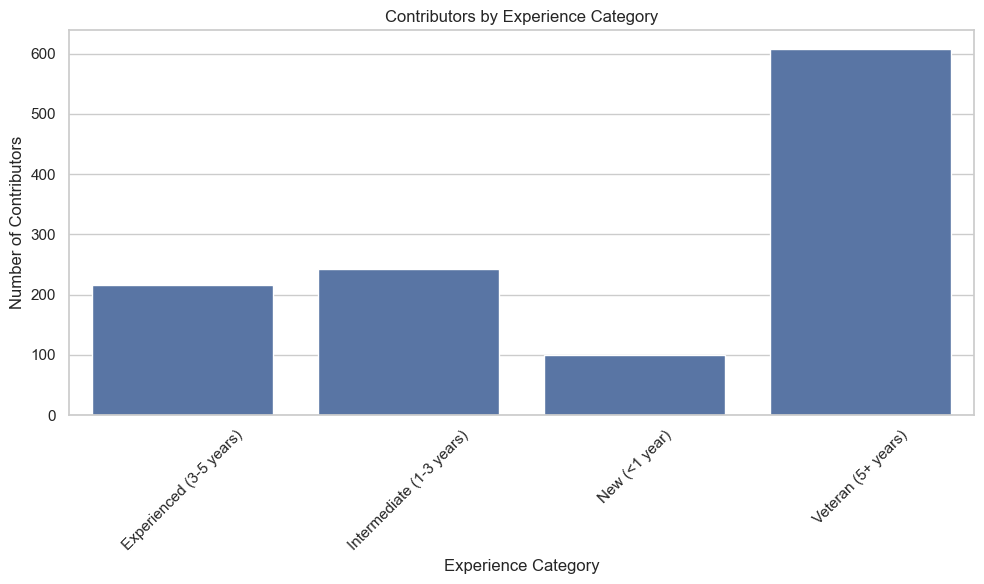

In [11]:
# Create contributor categories based on experience
def categorize_experience(years):
    if years < 1:
        return 'New (<1 year)'
    elif years < 3:
        return 'Intermediate (1-3 years)'
    elif years < 5:
        return 'Experienced (3-5 years)'
    else:
        return 'Veteran (5+ years)'

contributor_data['experience_category'] = contributor_data['years_since_first_commit'].apply(categorize_experience)

# Count contributors by experience category
experience_counts = contributor_data['experience_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=experience_counts.index, y=experience_counts.values)
plt.title('Contributors by Experience Category')
plt.xlabel('Experience Category')
plt.ylabel('Number of Contributors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Impact Analysis by Experience Category

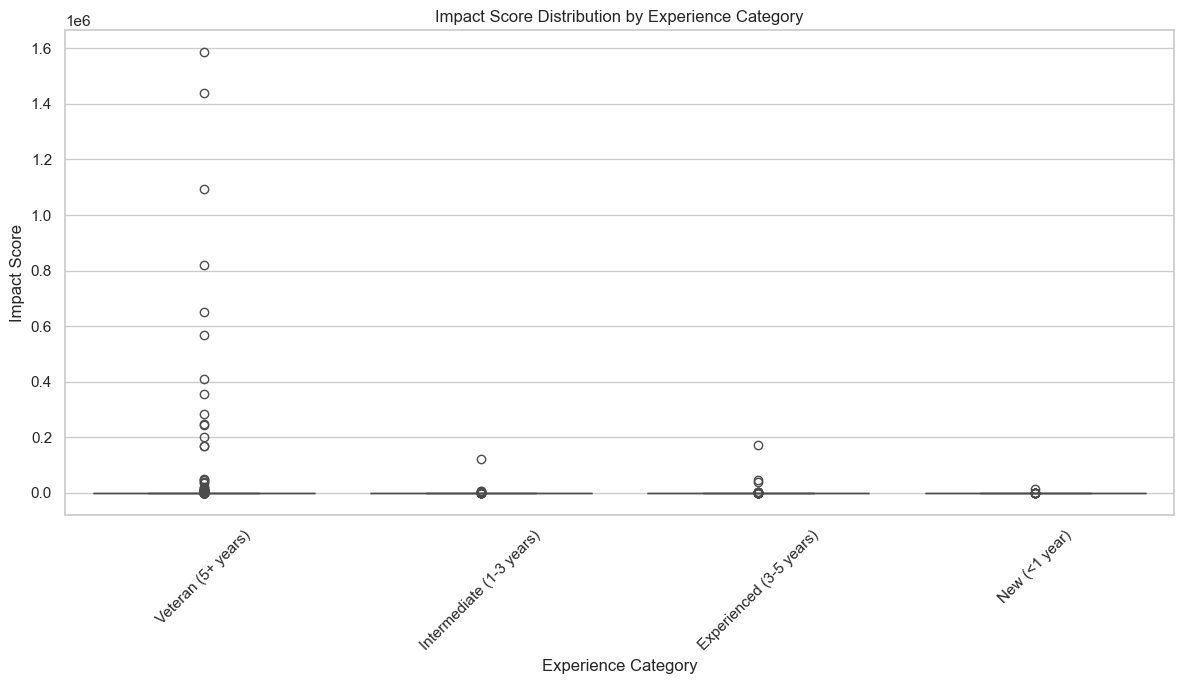

In [12]:
# Box plot of impact score by experience category
plt.figure(figsize=(12, 7))
sns.boxplot(x='experience_category', y='impact_score', data=contributor_data)
plt.title('Impact Score Distribution by Experience Category')
plt.xlabel('Experience Category')
plt.ylabel('Impact Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Average metrics by experience category
avg_by_experience = contributor_data.groupby('experience_category').agg({
    'total_commits': 'mean',
    'total_files_changed': 'mean',
    'total_additions': 'mean',
    'total_deletions': 'mean',
    'impact_score': 'mean',
    'weighted_impact_score': 'mean'
}).reset_index()

avg_by_experience

,experience_category,total_commits,total_files_changed,total_additions,total_deletions,impact_score,weighted_impact_score
0,Experienced (3-5 years),5.953704,106.120370,572.712963,335.069444,1363.953241,1327.288170
1,Intermediate (1-3 years),3.636364,21.351240,302.285124,152.392562,703.218595,670.352527
2,New (<1 year),1.350000,3.570000,118.090000,28.400000,257.844000,239.899988
3,Veteran (5+ years),45.789474,316.417763,6148.560855,3614.490132,14396.597697,13540.575362


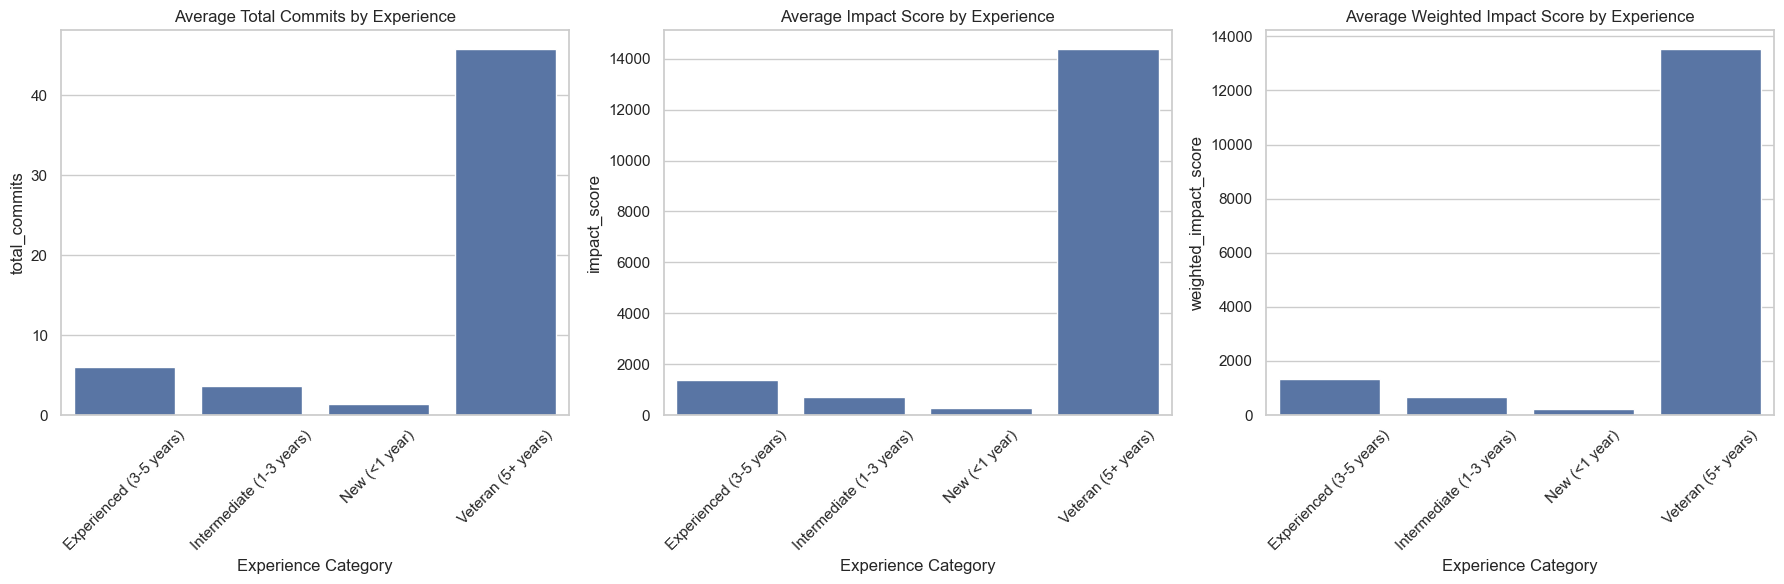

In [14]:
# Visualize average impact metrics by experience category
metrics = ['total_commits', 'impact_score', 'weighted_impact_score']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    sns.barplot(x='experience_category', y=metric, data=avg_by_experience, ax=axes[i])
    axes[i].set_title(f'Average {metric.replace("_", " ").title()} by Experience')
    axes[i].set_xlabel('Experience Category')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

## 6. Consistency and Recency Analysis

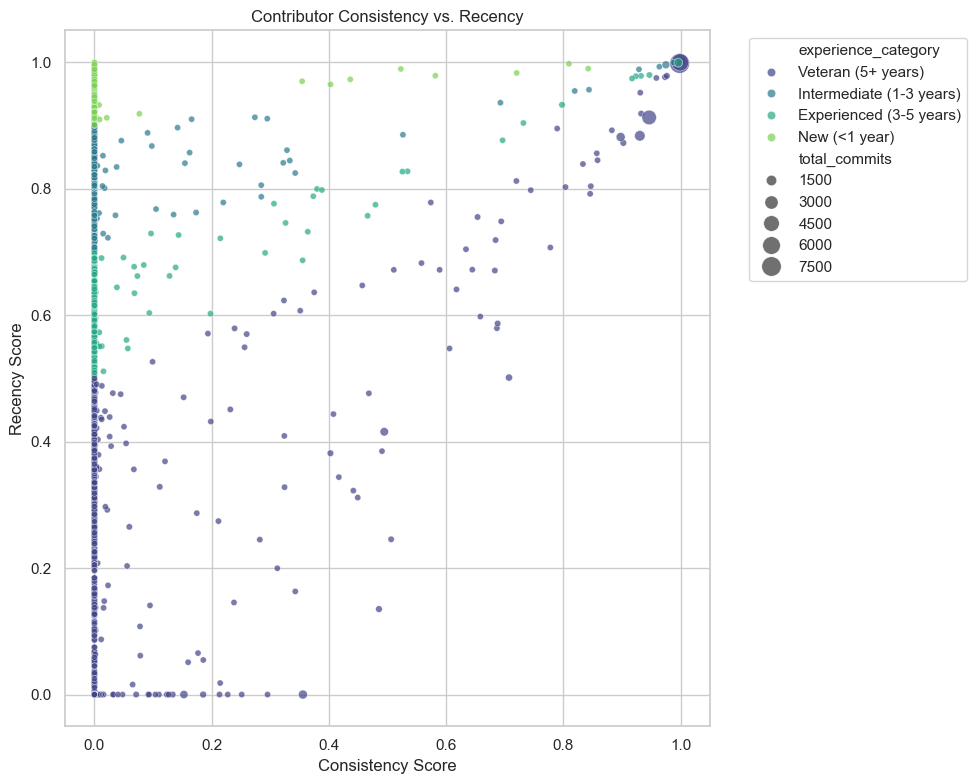

In [15]:
# Scatter plot of consistency vs. recency scores
plt.figure(figsize=(10, 8))
sns.scatterplot(x='consistency_score', y='recency_score', 
                size='total_commits', sizes=(20, 200),
                hue='experience_category', palette='viridis',
                alpha=0.7, data=contributor_data)
plt.title('Contributor Consistency vs. Recency')
plt.xlabel('Consistency Score')
plt.ylabel('Recency Score')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 7. Time-Based Analysis

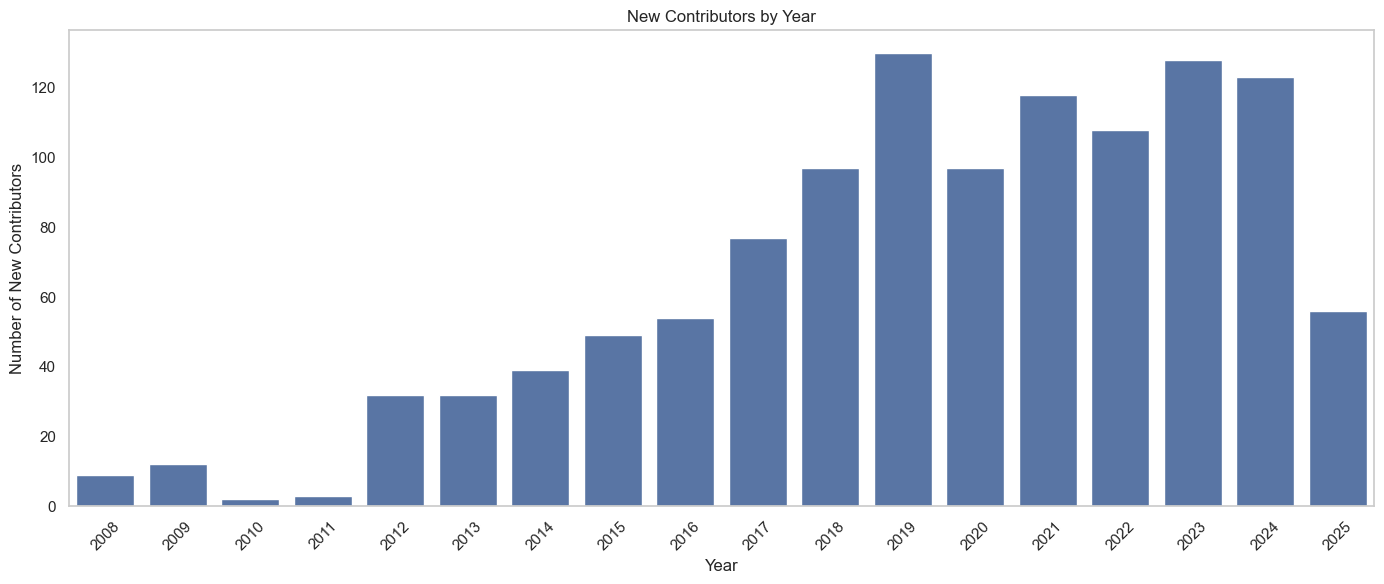

In [16]:
# Extract year from first contribution
contributor_data['first_year'] = contributor_data['first_contribution'].dt.year

# Count new contributors by year
new_contributors_by_year = contributor_data['first_year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.barplot(x=new_contributors_by_year.index, y=new_contributors_by_year.values)
plt.title('New Contributors by Year')
plt.xlabel('Year')
plt.ylabel('Number of New Contributors')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 8. Summary of Key Findings

Based on the exploratory data analysis, here are the key findings:

1. **Contributor Distribution**: The project has a mix of contributors with varying levels of experience, with the majority being relatively new contributors.

2. **Experience-Impact Relationship**: There appears to be a correlation between years of experience and impact score, suggesting that more experienced contributors tend to have higher impact.

3. **Contribution Patterns**: Most contributors make a small number of commits, while a small group of core contributors are responsible for a large portion of the codebase changes.

4. **Retention**: The contributor retention shows interesting patterns, with many contributors only active for a short period.

5. **Consistency vs. Recency**: There's a relationship between how consistently contributors participate and how recently they've been active.

These findings provide valuable insights into the dynamics of the Spring Boot contributor community and can help inform strategies for contributor engagement and retention.